<a href="https://colab.research.google.com/github/dohyeonYoon/Paper-review/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library + Dataset Load


In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Activation, add, Flatten, GlobalAveragePooling2D, Reshape, multiply
from keras.models import Model

import numpy as np
import tensorflow as tf
from keras.utils import np_utils

width = 32
height = 32

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 2s 0us/step


In [2]:
y_train.shape

(50000, 1)

In [3]:
num_classes = 10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
y_train.shape

(50000, 10)

In [5]:
validation_images, validation_labels = x_train[:500], y_train[:500]
train_images, train_labels = x_train[500:], y_train[500:]

In [6]:
y_train.shape

(50000, 10)

# Model 

In [7]:
def Residual_Block(x, filter):

    x_skip = x 
    f= filter

    x = Conv2D(f, kernel_size=(3,3), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(f, kernel_size=(3,3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x_skip = Conv2D(f, kernel_size=(1,1),strides=(1,1),padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)    


    x = add([x, x_skip])
    x = Activation('relu')(x)    
    
    return x


In [8]:
def Residual_Block_50(x, filters):
    f1, f2 = filters
    x_skip = x # 초기의 x

    x = Conv2D(f1, kernel_size=(1,1), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f1, kernel_size=(3,3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, kernel_size=(1,1), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x_skip = Conv2D(f2, kernel_size=(1,1),strides=(1,1),padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)  

    x = add([x, x_skip])
    x = Activation('relu')(x)     
    return x

https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/applications/resnet.py

In [10]:
 
inputs = Input(shape=(32,32,3))
x = Conv2D(64, kernel_size=7, strides=2, padding='valid')(inputs)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

for i in range(3):
  x = Residual_Block_50(x, filters = (64, 256))

for i in range(4):
  x = Residual_Block_50(x, filters = (128, 512))

for i in range(6):
  x = Residual_Block_50(x, filters = (256,1024))

for i in range(3):
  x = Residual_Block_50(x, filters = (512,2048))



x = GlobalAveragePooling2D()(x) 

outputs = Dense(10, activation = 'softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 13, 13, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 7, 7, 64)     0           conv2d_65[0][0]                  
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 7, 7, 64)     4160        max_pooling2d_1[0][0]            
______________________________________________________________________________________________

In [11]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [12]:
train_datagen.fit(train_images)
validation_datagen.fit(validation_images)

# Training

In [13]:
history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1547/1547 [==============================] - 263s 145ms/step - loss: 2.1517 - accuracy: 0.2358 - val_loss: 1.6221 - val_accuracy: 0.3900
Epoch 2/10
1547/1547 [==============================] - 221s 143ms/step - loss: 1.5499 - accuracy: 0.4344 - val_loss: 1.3469 - val_accuracy: 0.5000
Epoch 3/10
1547/1547 [==============================] - 221s 143ms/step - loss: 1.3801 - accuracy: 0.5072 - val_loss: 1.3704 - val_accuracy: 0.5060
Epoch 4/10
1547/1547 [==============================] - 220s 142ms/step - loss: 1.2551 - accuracy: 0.5511 - val_loss: 1.1775 - val_accuracy: 0.5900
Epoch 5/10
1547/1547 [==============================] - 221s 143ms/step - loss: 1.1359 - accuracy: 0.5971 - val_loss: 1.1407 - val_accuracy: 0.6020
Epoch 6/10
1547/1547 [==============================] - 221s 143ms/step - loss: 1.0383 - accuracy: 0.6359 - val_loss: 1.9063 - val_accuracy: 0.4160
Epoch 7/10
1547/1547 [==============================] - 221s 143ms/step - loss: 0.9552 - accuracy: 0.6635 - val_

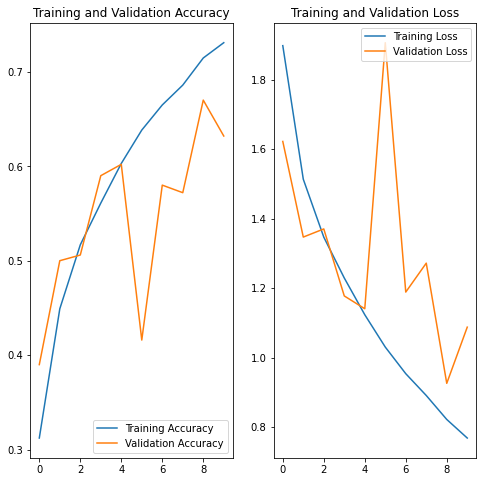

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()